
 <a name="1"></a>
# <span style="color:green">Задачи исследования:<span>

Исследовать архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет и определить рыночную стоимость объектов недвижимости.

По каждой квартире на продажу доступны два вида данных:
* первые вписаны пользователем
* вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

# План 

## 1. Осмотр и изучение данных

## 2. Предобработка данных

- проверка и предварительный анализ
- подготовка и очистка (каждую колонку)

## 3. Добавление данных
- добавление дополнительных метрик
    * цену квадратного метра;
    * день недели, месяц и год публикации объявления;
    * этаж квартиры; варианты — первый, последний, другой;
    * соотношение жилой и общей площади, а также отношение площади кухни к общей.

## 4. Исследовательский анализ данных
* Изучите следующие параметры: площадь, цена, число комнат, высота потолков.
  Постройте гистограммы для каждого параметра.

* Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану.
  Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

* Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

* Какие факторы больше всего влияют на стоимость квартиры?
  Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра.
  Также изучите зависимость от даты размещения: дня недели, месяца и года.

* Выберите 10 населённых пунктов с наибольшим числом объявлений.
  Посчитайте среднюю цену квадратного метра в этих населённых пунктах.
  Выделите населённые пункты с самой высокой и низкой стоимостью жилья.
  Эти данные можно найти по имени в столбце `locality_name`.

* Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра.
  Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр.
  Создайте столбец с расстоянием до центра в километрах: округлите до целых значений.
  После этого посчитайте среднюю цену для каждого километра.
  Постройте график: он должен показывать, как цена зависит от удалённости от центра.
  Определите границу, где график сильно меняется — это и будет центральная зона.

* Выделите сегмент квартир в центре.
  Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков.
  Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?


## 5. [Выводы и результаты исследования](#5)

Общие выводы по данным

# 1. Импорт библиотек и чтение данных

In [458]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams
rcParams['figure.figsize'] = 10,7

In [459]:
pd.set_option('display.max_columns', None)

In [460]:
df = pd.read_csv('datasets/eda_real_estate_data.csv', sep='\t')

In [461]:
df.head()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,area,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,1564812,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,108.0,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,NaN,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,40.4,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,Сталинский,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,56.0,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,NaN,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,159.0,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,NaN,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,100.0,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [462]:
df.sample(5)

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,area,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7999,NaN,4,3000000.0,33.0,2018-02-09T00:00:00,1,NaN,22.0,16.0,3,NaN,False,33.0,False,8.0,NaN,Санкт-Петербург,16017.0,13862.0,0.0,NaN,2.0,538.0,212.0
3507,NaN,9,5500000.0,56.0,2017-05-16T00:00:00,2,2.5,12.0,32.3,7,False,False,56.0,False,9.2,2.0,Санкт-Петербург,51247.0,15369.0,0.0,NaN,0.0,NaN,18.0
3799,NaN,9,5295000.0,53.7,2018-03-20T00:00:00,1,NaN,26.0,28.0,17,NaN,False,53.7,False,14.3,1.0,Санкт-Петербург,45469.0,18194.0,0.0,NaN,0.0,NaN,21.0
4826,1568627.0,12,6225000.0,52.1,2019-03-03T00:00:00,2,2.5,9.0,32.2,6,NaN,False,52.1,False,7.1,1.0,Санкт-Петербург,11578.0,12977.0,0.0,NaN,1.0,210.0,26.0
21092,NaN,10,9300000.0,70.0,2018-08-01T00:00:00,2,2.9,4.0,39.7,3,NaN,False,70.0,False,10.2,NaN,Пушкин,14372.0,26525.0,1.0,668.0,0.0,NaN,NaN


In [463]:
# по желанию можно поменять местами значения стобцов для удобства работы командой 
# df[[name_column_1, name_column2, . . . name_column_n]]

### Описание данных
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

# 2. Проверка данных и предварительный анализ

In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      6517 non-null object
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
area                    23699 non-null float64
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000

In [465]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,area,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,60.348651,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,35.654083,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,12.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,40.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,52.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,69.900000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,900.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [466]:
df.head()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,area,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,1564812,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,108.0,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,NaN,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,40.4,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,Сталинский,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,56.0,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,NaN,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,159.0,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,NaN,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,100.0,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [467]:
df.duplicated().sum()

0

In [468]:
# Проверим столбцы которые могут быть схожи
df[df['area'] != df['total_area']]

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,area,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


### Выводы по предварительному анализу

- Неизвестное значение столбцов building_series_id и is_apartment    
- Пропуски значений в стобцах:
    - building_series_id    
    - ceiling_height 
    - living_area
    - floors_total
    - is_apartment 
    - kitchen_area
    - balcony  
    - locality_name 
    - airports_nearest 
    - cityCenters_nearest
    - parks_around3000    
    - parks_nearest  
    - ponds_around3000 
    - days_exposition  
- Столбец rooms c минимальным занчение 0 - выглядит странно
- Повтор столбцов total_area и area
- Столбец first_day_exposition тип не datetime
- Столбец ceiling_height слишком высоко макс занчение высоты потолков
- Стобец floors_total тоже слишком велик с макс значением если это не БЦ "Лахта Центр"
- Столбец kitchen_area слишком экстремально минимальное значение.


**В датасете** имеются пропуски и экстремально критические значение в столбцах, которые бросились в глаза при первичном осмотре, также встретилось дублирование столбцов, о котором следует учесть при дальнейших выгрузках.

# 3. Подготовка и очистка данных

## 3.1. Индексы и названия столбцов

In [469]:
# 1 столбец выбивается из списка CamelCase исправим
df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)
# Проверим
df.columns.tolist()

['building_series_id',
 'total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'area',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'city_centers_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

## 3.2. Работа с дубликатами

In [470]:
# Удаляем дубликаты столбцов
df.drop(['area'], axis=1, inplace=True)


In [471]:
# Проверяем 
df.head(0)

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


## 3.3. Поиск пропущенных значений

- building_series_id    
- ceiling_height 
- living_area
- floors_total
- is_apartment 
- kitchen_area
- balcony  
- locality_name 
- airports_nearest 
- cityCenters_nearest
- parks_around3000    
- parks_nearest  
- ponds_around3000 
- days_exposition 

In [472]:
# Смотрим что с пропущенными значениями в процентном отношении
null_percentage = df.isnull().sum().sort_values(ascending=False)/len(df)*100
null_quantity = df.isnull().sum().sort_values(ascending=False)
col_isnull = pd.concat([null_percentage, null_quantity], axis=1)
col_isnull.columns = ['null_percentage','null_quantity']
col_isnull

,null_percentage,null_quantity
is_apartment,88.290645,20924
building_series_id,72.500949,17182
parks_nearest,65.909954,15620
ponds_nearest,61.559559,14589
balcony,48.605426,11519
ceiling_height,38.799105,9195
airports_nearest,23.384953,5542
city_centers_nearest,23.287902,5519
ponds_around3000,23.283683,5518
parks_around3000,23.283683,5518


### 3.3.1 Изучение пропусков

Изучение пропусков стоит начинать с самых важных на первый взгляд показателей. Так как это не заставит сначала решать задачи по замене пропусков неважных признаков. Они и воовсе могут удалиться как дубликаты или удалиться совсем из за отстутсвия нескольких важных признаков.

### Местоположение

- locality_name

Один из важнейших параметров выборки. Не зная местоположения, врядли кто то будет покупать квартиру. Так как данных столбцов всего 49, то из можно удалить.

In [473]:
# Удаляем и проверяем
df.dropna(subset=['locality_name'], inplace=True)

df['locality_name'].isna().sum()

0

In [474]:
# Чтобы узнать есть ли повторяющиеся значения проведем несколько операций
# df['locality_name'] = df['locality_name'].str.lower() # не принесло успеха но читаемость хуже
df['locality_name'].unique().tolist()

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

Посмотрим на значения населенных пунктов построчно их не так много
После просмотра видим
- 'посёлок Мурино'
- 'поселок Мурино'

Производим замену 

In [475]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)

In [476]:
len(df['locality_name'].unique())

330

In [477]:
# Топ 10
df['locality_name'].value_counts()[:10]

Санкт-Петербург      15721
поселок Мурино         556
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

### Апартаменты

In [478]:
# Пока до конца не ясно что это за признак, 
# скореее всего это жилой или не жилой фонд
df['is_apartment'].value_counts()

False    2710
True       50
Name: is_apartment, dtype: int64

In [479]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [480]:
# Меняем на жилой фонд
df['is_apartment'] = df['is_apartment'].fillna(False)
# Проверка
df['is_apartment'].isna().sum()

0

**Данный** признак не понадобиться для дальнейшего анализа, по этому проблемы с пропусками решаем не задумываясь заменой на False - (значит жилой фонд) к тому же анализ проводиться не по комерческой недвижимости.

### Тип строения

In [481]:
df['building_series_id'].unique()

array(['1564812', nan, 'Сталинский', '1568627.0', '1564812.0',
       '1568643.0', '1564806.0', '1564796.0', '1569038.0', '1564801.0',
       '1564801', '1569071.0', '1564792', 'Панельный', '1569071',
       '1564792.0', '1569054.0', '1569033.0', '504', '1569066',
       '600.11 серия', '1568690.0', '1564806', '712041.0', 'Брежневка',
       '1568627', '1568663.0', 'Старый фонд с КР', '1568734.0',
       '137 серия', 'сталинский', '712041', '1569066.0', 'Хрущевка',
       '600', '1569033', '1568675.0', 'Кирпичный монолит', '1564796',
       'Индивидуальный', 'старый фонд', 'кирп.монолит', 'Кирпичный',
       '1568663', 'Старый фонд', '1568658', 'Кирп.Монолит', '1569075.0',
       '1568658.0', '7', '1569038', '1569054', '1569061.0',
       '121 (Гатчинская)', '1568675', '602 серия', '1 ЛГ - 600.11', '137',
       '606 серия', '1569088.0', '1569048.0', '100', '1568643',
       '1569041.0', '121', '1569079.0', '1569041', 'хрущевка', 'Блочный',
       'старый фонд + капремонт', 'монолит', 

**Похоже** что стобец ```building_series_id``` характеризует конструктивное решения здания, которое не потребуется в исследовании

### Вид данных полученный автоматически. 

- parks_nearest
- ponds_nearest
- ponds_around3000
- parks_around3000
- city_centers_nearest
- airports_nearest

В данных которые получены автоматически пропуски убирать не будем

### Балконы
- balcony

In [482]:
# Количество пропусков
df['balcony'].isna().sum()

11513

In [483]:
# Взглянем на общее распределение + 11513 пропущенных значений
df['balcony'].value_counts(dropna=False)

NaN    11513
1.0     4187
0.0     3725
2.0     3658
5.0      304
4.0      182
3.0       81
Name: balcony, dtype: int64

In [484]:
# Посмотрим какое количество отсутствующих значений в столбце балконы на 1 этаже здания
df[(df['balcony'].isna()) & (df['floor'] == 1)]

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16,NaN,11,6700000.0,82.0,2017-11-23T00:00:00,3,3.05,5.0,55.60,1,False,False,False,9.0,NaN,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0
37,NaN,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,False,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
70,NaN,9,3400000.0,30.0,2018-09-05T00:00:00,1,NaN,5.0,16.00,1,False,False,False,7.0,NaN,Санкт-Петербург,39053.0,8313.0,1.0,382.0,0.0,NaN,14.0
76,NaN,12,2800000.0,55.1,2016-05-14T00:00:00,3,2.60,5.0,38.40,1,False,False,False,4.9,NaN,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,606.0
84,1564812.0,11,2400000.0,43.9,2019-03-13T00:00:00,2,NaN,2.0,27.46,1,False,False,False,5.2,NaN,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23651,NaN,7,3350000.0,41.0,2018-12-17T00:00:00,1,NaN,6.0,18.00,1,False,False,False,12.0,NaN,поселок городского типа Токсово,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23663,NaN,12,6400000.0,88.0,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,False,False,False,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23680,1569088.0,14,5000000.0,59.0,2019-04-04T00:00:00,3,2.50,5.0,52.00,1,False,False,False,7.0,NaN,Санкт-Петербург,26835.0,11878.0,0.0,NaN,0.0,NaN,NaN
23696,NaN,18,2500000.0,56.7,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,False,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [485]:
# Меняем значение Nan на 0
df['balcony'] = df['balcony'].fillna(0)
# Проверяем замену
df['balcony'].isnull().sum()

0

In [486]:
# Меняем тип данных с float64 на int 
df['balcony'] = df['balcony'].astype(int)

In [487]:
df['balcony'].value_counts()

0    15238
1     4187
2     3658
5      304
4      182
3       81
Name: balcony, dtype: int64

**Если** человек не указал количество балконов -  это скорее всего означает что их нет, так как вероятность того что их нет выше чем вероятность того что он забыл их указать. Наличие балкона это несравненный плюс нежели его отсутствие. Также можно предположить что в частных строениях, часто будет отсутствовать данный признак.
Поэтому произвели замену на 0 и данный признак привели к целочисленному типу данных

### Высота потолков
- ceiling_height	

In [488]:
# Напомним количество пропущенных значений
df['ceiling_height'].isna().value_counts()

False    14490
True      9160
Name: ceiling_height, dtype: int64

In [489]:
# Посмотрим на параметры высоты потолков
df['ceiling_height'].describe()

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Посмотрим на выборку с разными срезами, присутствуют как предельно низкие, так и слишком высокие значения.

In [490]:
# Высота потолков меньше 2 метров
len(df[df['ceiling_height'] <= 2])

14

In [491]:
# Высота которая меньше ГОСТ жилых зданий
len(df[df['ceiling_height'] <= 2.4])

44

In [492]:
# Высота больше 6 метров
len(df[df['ceiling_height'] > 5])

36

In [493]:
df['ceiling_height'] = df['ceiling_height'].fillna(2.5) 
# Проверим замену

df['ceiling_height'].isna().sum()

0

**Вывод:**

Важность данного параметра не высока.

Исследовав высоту потолков можно отметить что в выборке присутствуют выбросы. Так как трудно представить, метровый потолок в многоэтажном здании также как и более 5 метров. Здесь пропуски логично заменить на минимальное значение ГОСТ для зданий и сообружений - 2,5 метра. 

### Количество дней размещения публикации
- days_exposition

Данный параметр может показать ликвидность обьекта от места расположения и привлекательность района.

In [494]:
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median())

In [495]:
df['days_exposition'].isna().sum()

0

**Вывод:**

По вопросу отсутствия данного значения нужно разговаривать с разработчиками или администратором баз данных. Информация о размещении и дне снятия с публикации должна присутствовать в системе.
При вынужденной замене лучше выбрать медианное значение.

### Жилая площадь
- living_area

Стоит заметить что здесь очень важно понимать разницу (как толкует ее Жилищный Кодекс) между 
- **жилой площадью** - сумма площадей жилых комнат. Кухня, ванна, туалет, балкон и подобные им комнаты не являются частью жилой площади
- **общей площадью** – сумма площадей всех комнат, составляющих данную квартиру, в том числе подсобных помещений, кроме лоджий, балконов, веранд и террас. К подсобным помещениям относятся площади кухонь, коридоров, ванных, санузлов, встроенных шкафов, кладовых, а также площадь, занятая внутриквартирной лестницей.

### Площадь кухни
- kitchen_area


In [496]:
# Посмотрим сколько значений отсуттвует в квартирах студиях, так как она совмещена с другой комнатой
df[(df['kitchen_area'].isna()) & (df['studio'] == True)]

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,NaN,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.50,24.0,15.50,2,False,True,False,NaN,2,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,NaN,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.50,17.0,24.75,4,False,True,False,NaN,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,NaN,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.50,10.0,NaN,7,False,True,False,NaN,0,поселок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,NaN,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,False,True,False,NaN,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,NaN,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,False,True,False,NaN,0,поселок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,NaN,8,3090000.0,30.00,2017-12-17T00:00:00,0,2.50,25.0,18.20,5,False,True,False,NaN,0,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22877,NaN,2,4280000.0,28.00,2017-10-26T00:00:00,0,2.70,19.0,18.00,10,False,True,False,NaN,0,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23210,NaN,7,3200000.0,26.00,2017-09-01T00:00:00,0,2.50,25.0,18.00,16,False,True,False,NaN,0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23554,NaN,15,3350000.0,26.00,2018-09-07T00:00:00,0,2.50,19.0,NaN,8,False,True,False,NaN,0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


Менять отсутствующие значения столбца ```kitchen_area``` на среднюю или медиану не целесообразно так как общая площадь квартир совершенно разная. 

#### Поэтому:

- Здесь мы должны либо выделить категории в зависимости от общей площади, далее в каждой категории посмотреть среднюю или медиану площади кухни и уже заполнять значения.
- Либо категоризировать по количеству комнат и уже заполнять значения в зависимости от среднего или медианы этого параметра.

В любом случае если производить замену нужно категоризировать квартиры по какому либо признаку.

### Этажность дома  
- floors_total

In [497]:
df['floors_total'].isna().sum()

85

В дальнейшем этот показатель поможет нам категоризировать недвижимость с последним этажом.
Пропуски не критичны, но мы поступим следующим образом. 
- ✔️ - Из всей выборки возьмем процент последнего этажа и заполним часть пропусков этих значений значением этажа, как будто это последний этаж здания 
- ✔️ - Заполять значения последнего этажа цифрой 1 нельзя, значение должно быть не меньше чем этаж квартиры.

In [498]:
# Находим все квартиры на последнем этаже
df[(df['floors_total'] == df['floor'])].head()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12,NaN,10,3890000.0,54.0,2016-06-30T00:00:00,2,2.50,5.0,30.0,5,False,False,False,9.0,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
13,1568627.0,20,3550000.0,42.8,2017-07-01T00:00:00,2,2.56,5.0,27.0,5,False,False,False,5.2,1,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0
23,1564806.0,11,2950000.0,32.0,2016-10-29T00:00:00,1,2.60,9.0,17.7,9,False,False,False,6.1,0,Санкт-Петербург,15414.0,14211.0,2.0,517.0,1.0,190.0,615.0
36,NaN,13,3790000.0,45.0,2017-01-25T00:00:00,2,2.50,9.0,27.0,9,False,False,False,6.3,2,Санкт-Петербург,49574.0,16461.0,1.0,459.0,0.0,NaN,139.0
43,NaN,13,9330000.0,48.0,2017-01-10T00:00:00,2,3.00,4.0,28.0,4,False,False,False,7.5,0,Санкт-Петербург,15016.0,10822.0,0.0,NaN,1.0,492.0,763.0


In [499]:
# Считаем процент квартир находящхся на последнем этаже относительно всех квартир
percent = len(df[(df['floors_total'] == df['floor'])])/len(df)*100
percent

14.186046511627906

In [500]:
# Далее берем этот процент от пропусков и считаем сколько пропусков можно заполнить 
85*percent/100
# мы можем заполнить 12 пропусков(14 % значений - значнеим последнего этажа)

12.058139534883718

In [501]:
# Получаем список индексов которые не имеют значения floor_total == nan
row_nan_floor_total = df[df['floors_total'].isna()].index.tolist()
# Получаем 12 рандомных значений строк из 85 имеющихся которые мы будем заменять
random_row_replace = random.choices(row_nan_floor_total, k = 12)
random_row_replace

[12399,
 13438,
 7922,
 10319,
 22656,
 14526,
 1757,
 15989,
 21753,
 14094,
 20146,
 5146]

In [502]:
# встечающаяся этажность квартир где отсутствует общая этажность здания
# берем 12 рандомных значений этажности
floor_random = df[df['floors_total'].isna()]['floor'].unique()
floor_random = random.choices(floor_random, k = 12)
floor_random

[5, 22, 3, 4, 10, 12, 19, 20, 9, 14, 6, 22]

In [503]:
def replaсe(df):
    """
    Функция производит замену в строках указанных в списке 
    на заданные значения в другом списке
    random_row_replace - рандомные строки которые нужно заменить
    floor_random - рандомные значения на которые нужно заменить
    """
    # получаем картеж значений (0, 2846), (1, 14264) ...
    for i in enumerate(random_row_replace):
        df.loc[i[1],'floors_total'] = floor_random[i[0]]
    return df

In [504]:
replaсe(df)

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,1564812,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0
1,NaN,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.50,11.0,18.6,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,Сталинский,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.50,5.0,34.3,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,NaN,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.50,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,NaN,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,1564812.0,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,95.0
23695,NaN,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.50,5.0,38.0,4,False,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,NaN,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.50,3.0,29.7,1,False,False,False,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,95.0
23697,NaN,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,False,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [505]:
# Проверяем как заполнилась часть наших значений
df['floors_total'].isna().sum()

73

In [506]:
df[df['floors_total'].isna()]['floor'].value_counts()

6     9
4     8
8     7
12    5
3     4
5     4
7     4
9     4
21    3
19    3
18    3
13    3
11    2
2     2
1     2
10    2
14    2
15    2
23    1
20    1
22    1
24    1
Name: floor, dtype: int64

In [507]:
# Остальные значения удаляем так как их всего 74 но можно было бы заменить на значение 'floor'
# этажа имеющейся квартиры, на 1 менять нельзя так как будет конфликт со столбцом 'floor'
# этажность дома не может быть меньше этажа продающейся квартиры 
df.dropna(subset = ['floors_total'], inplace=True)
# Проверяем пропуски
df['floors_total'].isna().sum()

0

#### Вывод

В параметре ```floors_total``` часть значений была заполнена по более сложной схеме. Остальные значения были удалены. Если значений пропущено много то заполнять следует каждый этаж пропорционально всего датафреймфа

### 3.3.2 Приведение типов данных

- first_day_exposition в datetime()
- floors_total / days_exposition - int

In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23577 entries, 0 to 23698
Data columns (total 23 columns):
building_series_id      6510 non-null object
total_images            23577 non-null int64
last_price              23577 non-null float64
total_area              23577 non-null float64
first_day_exposition    23577 non-null object
rooms                   23577 non-null int64
ceiling_height          23577 non-null float64
floors_total            23577 non-null float64
living_area             21707 non-null float64
floor                   23577 non-null int64
is_apartment            23577 non-null bool
studio                  23577 non-null bool
open_plan               23577 non-null bool
kitchen_area            21348 non-null float64
balcony                 23577 non-null int32
locality_name           23577 non-null object
airports_nearest        18052 non-null float64
city_centers_nearest    18075 non-null float64
parks_around3000        18076 non-null float64
parks_nearest      

In [509]:
# Заменяем значение на datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

In [510]:
# И int где нам нужны целые числа
for column in ['floors_total', 'days_exposition']:
    df[column] = df[column].astype('int')


In [511]:
df.head(1)

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,1564812,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95


### 3.4 Добавление данных
- добавление дополнительных метрик
    * цену квадратного метра[x]
    * день недели, месяц и год публикации объявления[x]
    * этаж квартиры; варианты — первый, последний, другой[x]
    * соотношение жилой и общей площади, а также отношение площади кухни к общей[x]

In [512]:
# Цена за кв. метр
df['price_one_meter'] = df['last_price']/df['total_area']

In [513]:
# Время публикаций обьявления
df['day_exposition'] = df['first_day_exposition'].dt.day_name()
df['month_exposition'] = df['first_day_exposition'].dt.month_name()
df['year_exposition'] = df['first_day_exposition'].dt.year
# если требуется числовое выражение используем dt.dayofweek, dt.month

In [514]:
# Категоризирум этажность

def floor_category(row):
    if row['floor'] == 1:
        return 'first'
    elif row['floor'] == row['floors_total']:
        return 'last'
    return 'other'

In [515]:
df['floor_category'] = df.apply(floor_category, axis=1)

In [516]:
# Соотношение жилой и общей площади в %
df['total_living_area_ratio'] = df['living_area'] / df['total_area']*100
df['total_living_area_ratio'] = df['total_living_area_ratio'].round(decimals=3)

In [517]:
# Соотношение площади кухни и общей площади в %
df['total_kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']*100
df['total_kitchen_area_ratio'] = df['total_kitchen_area_ratio'].round(decimals=3)

Количество дней размещения публикации. Разбили данный признак на категории чтобы посмотреть на общую картину. Здесь возможно поиграться с созданной категорией увеличив или уменьшив сроки для создания категорий. Важно заметить что разделение на категории должен работать совместно с другими показателями, например такие как цена и район

In [518]:
# Попробуем сделать из значения "days_exposition" что то вроде параметра ликвидности 

def category_days_exposition(days):
    """
    ВАЖНО! данный параметр всегда сравнивается с показателем средней цены по району
    в вакуме не рассматривается
    
    Параметры могут изменяться в зависимости от географич. расположения и  экономической ситиации
    
    Разбиваем на категории ликвидности:
    1 - высокая ликвидность
    2, 3 - нормальная ликвидность
    4 - низкая ликвидность
    5 - отсутствие ликвидности (повторюсь что на эту метрику влияют другие параметры)
    """
    if days < 50:
        return 1
    elif days < 100:
        return 2
    elif days < 200:
        return 3
    elif days < 350:
        return 4
    else:
        return 5
    


In [519]:
df['category_days_exposition'] = df['days_exposition'].apply(category_days_exposition)

In [520]:
# Учитываем что в 5 категории присутствуют отсутствующие значеия
df['category_days_exposition'].value_counts()

2    7368
1    6264
3    4096
5    3231
4    2618
Name: category_days_exposition, dtype: int64

In [521]:
# Проверяем все добавленные столбцы
df.head(2)

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day_exposition,month_exposition,year_exposition,floor_category,total_living_area_ratio,total_kitchen_area_ratio,category_days_exposition
0,1564812,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95,120370.370370,Thursday,March,2019,other,47.222,23.148,2
1,NaN,7,3350000.0,40.4,2018-12-04,1,2.5,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920.792079,Tuesday,December,2018,first,46.040,27.228,2


#  4. Исследовательский анализ данных


In [522]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,year_exposition,total_living_area_ratio,total_kitchen_area_ratio,category_days_exposition
count,23577.000000,2.357700e+04,23577.000000,23577.000000,23577.000000,23577.000000,21707.000000,23577.00000,21348.000000,23577.000000,18052.000000,18075.000000,18076.000000,8037.000000,18076.000000,9041.000000,23577.000000,2.357700e+04,23577.000000,21707.000000,21348.000000,23577.000000
mean,9.876193,6.538886e+06,60.316324,2.070408,2.666622,10.676634,34.450363,5.88158,10.561113,0.593375,28794.288777,14195.637787,0.611640,490.613662,0.769307,518.250857,169.191331,9.940218e+04,2017.370955,56.489912,18.735076,2.541248
std,5.681446,1.090831e+07,35.650652,1.078469,0.997792,6.595031,22.043759,4.87497,5.900034,0.960509,12632.995397,8612.715833,0.801993,341.539293,0.938496,277.950279,206.462739,5.037853e+04,1.037342,10.532750,7.297625,1.350579
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.00000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.118349e+02,2014.000000,2.158000,2.538000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.500000,5.000000,18.600000,2.00000,7.000000,0.000000,18563.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000,7.656613e+04,2017.000000,49.533000,13.333000,1.000000
50%,9.000000,4.640000e+06,52.000000,2.000000,2.500000,9.000000,30.000000,4.00000,9.100000,0.000000,26753.500000,13101.000000,0.000000,455.000000,1.000000,503.000000,95.000000,9.500000e+04,2017.000000,56.818000,17.241000,2.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.300000,8.00000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,198.000000,1.142098e+05,2018.000000,63.790000,23.243000,3.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.00000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,2019.000000,100.000000,78.788000,5.000000


## Функция на ящик с усами

In [523]:
# Так как графиков придется строить много напишем класс с несколькими методами
class Chart:
    def __init__(self,df=None, column=None, width=10, height=6,):
        self.df = df
        self.column = column
        self.width = width
        self.height = height 
        
    def give_boxplot(self, df, column, value=None):
        """
        Метод построение ящиков с усами 
        с ограничением в 1.5 квартильных размаха
        При передаче параметра
        value - возвращает Series переданного столбца
        """  
        q1 = df[column].quantile(0.25) 
        q3 = df[column].quantile(0.75)
        # межквантильный размах
        range_quantile = q3 - q1   
        data = df[(df[column] >= (q1 - 1.5*range_quantile)) & 
                  (df[column] <= (q3 + 1.5*range_quantile))]
        if value:
            return data[column]
        return data.boxplot([column], figsize=(self.width, self.height))
    
    def give_boxplot_param(self, df, column, start, finish):
        """
        Метод построение ящиков с усами 
        с заданными параметрами
        start - начальное значение
        finish - конечное значение
        """   
        data = df[(df[column] >= start) & (df[column] <= finish)]
        return data.boxplot([column], figsize=(self.width, self.height))
    
#     def give_histogramm(self, df, column):
#         return df[column].hist()
    
#     def give_two_histograms(self, x, y, title, xlabel=None, ylabel=None, bins=None):
#         """
#         Функция, которая построит две гистограммы на одной картинке.
#         Дополнительно пунктирными линиями указываются средние значения выборок.
#         x: вектор pd.Series,
#         y: вектор pd.Series
#         """
#         x.hist(alpha=0.5, color='blue', label='xxx', bins=bins)
#         y.hist(alpha=0.3, color='red', label='yyy', bins=bins)
#         plt.axvline(x.mean(), color='red', alpha=1, linestyle='dashed')
#         plt.axvline(y.mean(), color='blue', alpha=0.9, linestyle='dashed')
#     #     plt.legend([x.name, y.name])
#         plt.title(title)
#         plt.xlabel(xlabel)
#         plt.ylabel(ylabel)
#         plt.legend();

In [524]:
# Создаем экземпляр класса для построения графиков
param = Chart()

### 4.1. Изучите следующие параметры: площадь, цена, число комнат, высота потолков.
  - Построить гистограммы и графики boxplot для каждого параметра.
  - поработать с выбросами и сделать выводы

### Общая площадь

In [525]:
df['total_area'].describe()

count    23577.000000
mean        60.316324
std         35.650652
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

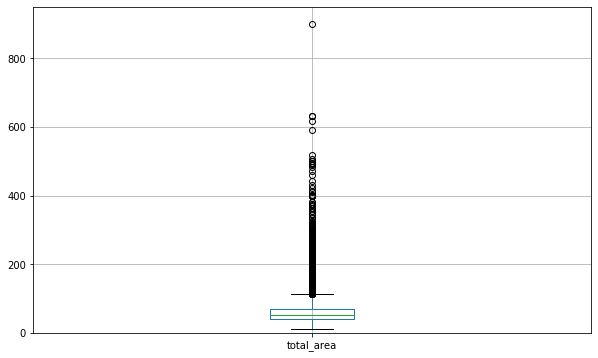

In [526]:
# Общая площадь все значения
param.give_boxplot_param(df, 'total_area', 12, 900).set_ylim(0,950);

Видим что значения расположились примерно в диапазоне от 12 до 115. Первым квартилем около 40 и третим около 70 кв.м

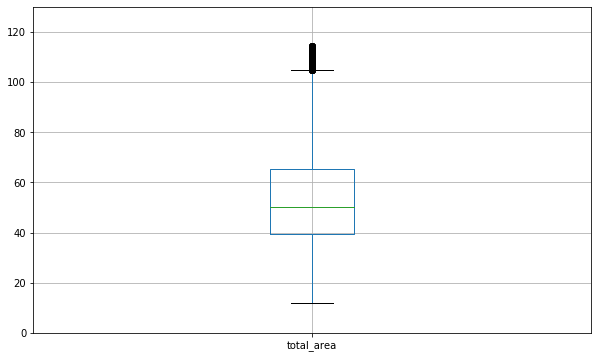

In [527]:
# Отбрасываем выбросы
param.give_boxplot(df, 'total_area').set_ylim(0,130);

После очистки выбросов получаем слегка измененную картинку с медианой около 50

Посмотрим на гистограмму распределения

In [528]:
total_area = param.give_boxplot(df, 'total_area',value=1)
total_area.describe()

count    22338.000000
mean        54.316068
std         19.329403
min         12.000000
25%         39.400000
50%         50.000000
75%         65.500000
max        114.200000
Name: total_area, dtype: float64

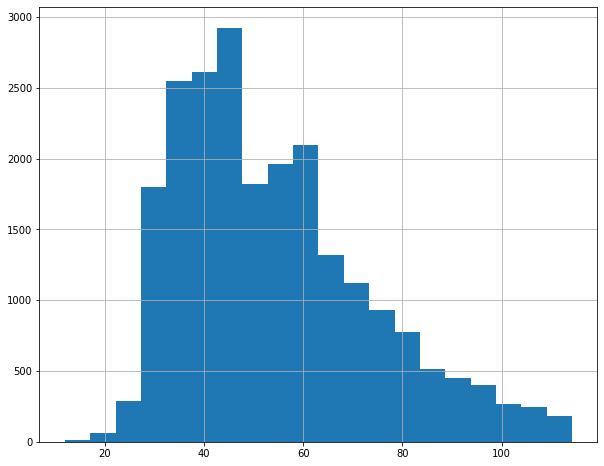

In [529]:
total_area.hist(bins=20, figsize=(10,8));

**Вывод**
- после очистки от выбросов получили вполне нормальные значения медиану и среднюю около 50 кв.м. Но опять же мы наверняка отбросили значения более 115 кв.м которые тоже кажуться адекватными. Такая недвижимость должна присутствовать на рынке. Особенно экзепляры в частном секторе.

### Цена

In [530]:
df['last_price'].describe()

count    2.357700e+04
mean     6.538886e+06
std      1.090831e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.640000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

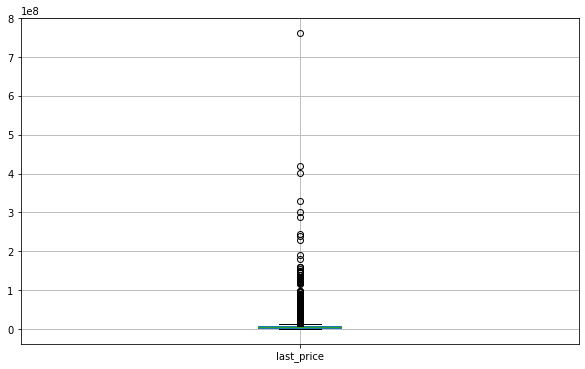

In [531]:
param.give_boxplot_param(df,'last_price', 0, 800000000);

Максимальное значение близиться к 800000000 млн. минимальное в нуле.
Посмотрим на экстремальные значения меньше 200 тысю и более 200 млн.

In [532]:
min_max_values = df[(df['last_price'] < 200000) | 
                    (df['last_price'] > 200000000)]
min_max_values

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day_exposition,month_exposition,year_exposition,floor_category,total_living_area_ratio,total_kitchen_area_ratio,category_days_exposition
1436,NaN,19,330000000.0,190.0,2018-04-04,3,3.50,7,95.0,5,False,False,False,40.0,0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233,1.736842e+06,Wednesday,April,2018,other,50.000,21.053,4
5893,NaN,3,230000000.0,500.0,2017-05-31,6,2.50,7,NaN,7,False,False,False,40.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50,4.600000e+05,Wednesday,May,2017,last,NaN,8.000,2
8793,1564812.0,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8,1.118349e+02,Wednesday,March,2019,last,29.358,37.156,1
12971,NaN,19,763000000.0,400.0,2017-09-30,7,2.50,10,250.0,10,False,False,False,NaN,2,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33,1.907500e+06,Saturday,September,2017,last,62.500,NaN,1
13749,NaN,7,240000000.0,410.0,2017-04-01,6,3.40,7,218.0,7,False,False,False,40.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,199,5.853659e+05,Saturday,April,2017,last,53.171,9.756,3
14706,NaN,15,401300000.0,401.0,2016-02-20,5,2.50,9,204.0,9,False,False,False,24.0,3,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393,1.000748e+06,Saturday,February,2016,last,50.873,5.985,5
15651,NaN,20,300000000.0,618.0,2017-12-18,7,3.40,7,258.0,5,False,False,False,70.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111,4.854369e+05,Monday,December,2017,other,41.748,11.327,3
16461,NaN,17,245000000.0,285.7,2017-04-10,6,3.35,7,182.8,4,False,False,False,29.8,0,Санкт-Петербург,33143.0,6235.0,3.0,400.0,3.0,140.0,249,8.575429e+05,Monday,April,2017,other,63.983,10.431,4
19540,NaN,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106,4.666667e+05,Wednesday,December,2017,last,45.522,12.444,3
22831,1564812.0,18,289238400.0,187.5,2019-03-19,2,3.37,6,63.7,6,False,False,False,30.2,0,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,95,1.542605e+06,Tuesday,March,2019,last,33.973,16.107,2


Как и ожидали максимальные значения в Санкт-Петербурге. Его можно вывести и рассмотреть как отдельную категорию

In [533]:
# Нам не нужна двухкомнатная квартира за 12 тысяч в центре Санкт-Петербурга
df.loc[df['last_price'] < 20000]

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day_exposition,month_exposition,year_exposition,floor_category,total_living_area_ratio,total_kitchen_area_ratio,category_days_exposition
8793,1564812.0,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8,111.834862,Wednesday,March,2019,last,29.358,37.156,1


In [534]:
df.drop([8793], inplace=True)

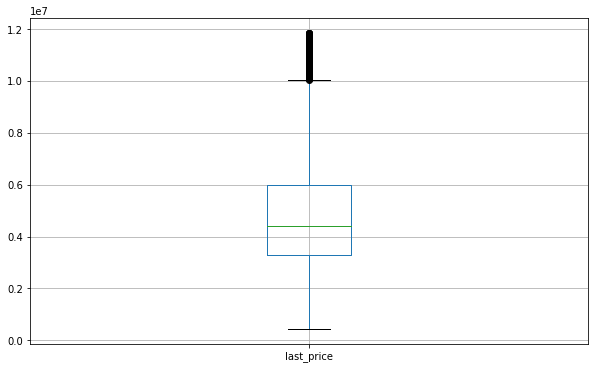

In [535]:
# Смотрим на ящик
param.give_boxplot(df, 'last_price');

In [536]:
# Получаем среднюю и медиану a а хатя посмотрим на весь столбец чистых данных
print(param.give_boxplot(df, 'last_price', value=1).mean())
last_price = param.give_boxplot(df, 'last_price', value=1)
last_price.describe()

4837003.7614491405


count    2.153000e+04
mean     4.837004e+06
std      2.215172e+06
min      4.300000e+05
25%      3.300000e+06
50%      4.400000e+06
75%      5.999749e+06
max      1.186686e+07
Name: last_price, dtype: float64

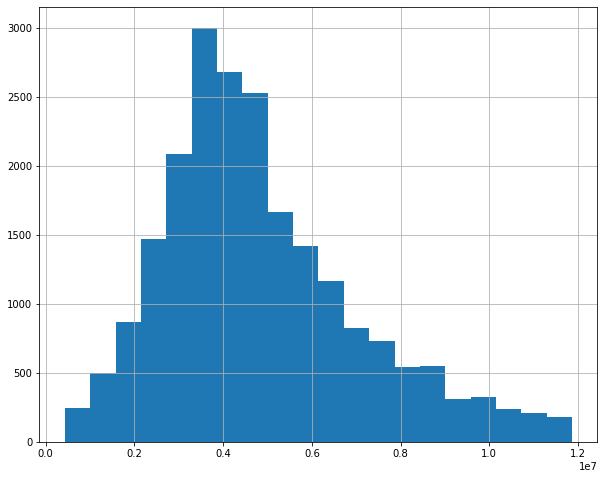

In [537]:
# Гистограмма распределения цены без выбросов
last_price[(last_price > 400000) & (last_price < 12000000)].hist(bins=20, figsize=(10,8));


**Вывод**

После очистки выбросов получили среднюю около 5 млн. и верхний предел вблизи 12 млн. Но стоит заметить что скорее всего Спб нужно расчитывать отдельно. В нем навярняка средняя будет выше, а в поселках и деревнях наоборот.

### Число комнат

In [538]:
df.head(1)

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day_exposition,month_exposition,year_exposition,floor_category,total_living_area_ratio,total_kitchen_area_ratio,category_days_exposition
0,1564812,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95,120370.37037,Thursday,March,2019,other,47.222,23.148,2


In [539]:
df['rooms'].describe()

count    23576.000000
mean         2.070411
std          1.078492
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

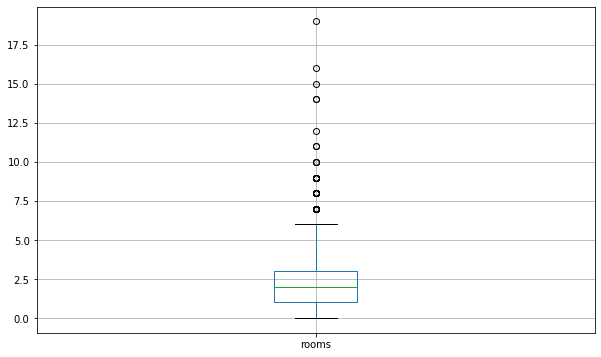

In [540]:
param.give_boxplot_param(df, 'rooms', 0, 20);

In [541]:
# Смотрим на нулевые значения
zero_rooms_and_not_studio = df[(df['rooms'] == 0) & (df['studio'] == False)]
len(zero_rooms_and_not_studio)

59

In [542]:
zero_rooms_and_not_studio

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day_exposition,month_exposition,year_exposition,floor_category,total_living_area_ratio,total_kitchen_area_ratio,category_days_exposition
349,NaN,4,2320000.0,25.00,2017-09-27,0,2.50,14,17.0,1,False,False,True,NaN,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45,92800.000000,Wednesday,September,2017,first,68.000,NaN,1
508,NaN,0,3375000.0,34.40,2017-03-28,0,2.50,26,24.3,19,False,False,True,NaN,1,поселок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430,98110.465116,Tuesday,March,2017,other,70.640,NaN,5
780,NaN,9,2600000.0,26.10,2018-02-20,0,2.50,18,NaN,8,False,False,True,NaN,1,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45,99616.858238,Tuesday,February,2018,other,NaN,NaN,1
839,NaN,14,1900000.0,35.00,2017-04-14,0,2.70,5,15.0,3,False,False,True,NaN,1,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7,54285.714286,Friday,April,2017,other,42.857,NaN,1
946,NaN,5,2200000.0,23.00,2016-09-27,0,2.50,27,18.0,7,False,False,True,NaN,2,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483,95652.173913,Tuesday,September,2016,other,78.261,NaN,5
1574,NaN,0,2200000.0,22.00,2017-11-03,0,2.50,18,15.0,16,False,False,True,NaN,1,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81,100000.000000,Friday,November,2017,other,68.182,NaN,2
1625,NaN,7,1980000.0,23.98,2018-02-01,0,2.50,4,10.5,3,False,False,True,NaN,1,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120,82568.807339,Thursday,February,2018,other,43.786,NaN,3
2532,NaN,5,3500000.0,27.10,2018-02-01,0,2.50,18,18.7,9,False,False,True,NaN,2,Санкт-Петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70,129151.291513,Thursday,February,2018,other,69.004,NaN,2
3019,NaN,18,2100000.0,24.00,2017-11-10,0,2.50,10,18.0,6,False,False,True,NaN,2,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5,87500.000000,Friday,November,2017,other,75.000,NaN,1
4115,NaN,7,2600000.0,24.00,2018-02-01,0,2.50,25,18.0,4,False,False,True,NaN,2,Санкт-Петербург,10031.0,13330.0,1.0,915.0,0.0,NaN,42,108333.333333,Thursday,February,2018,other,75.000,NaN,1


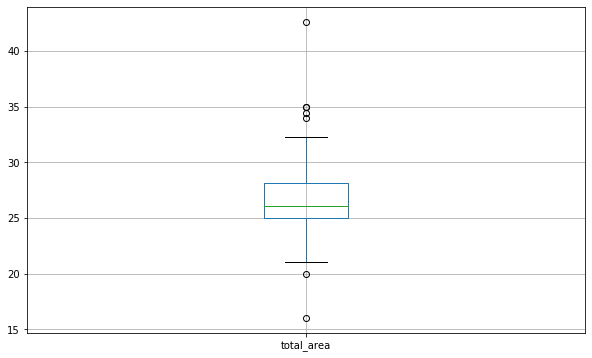

In [543]:
# График площадей квартир без комнат и которые не являются студиями
param.give_boxplot_param(zero_rooms_and_not_studio, 'total_area', 0, 100);

**Странно** что нет комнат и это не студия. Взглянув на значения можно увидеть что площадь 59 таких квартир укладывается в 45 кв.м. Можем предположить что здесь ошибки в данных. Так как жилая площадь присутсвует.

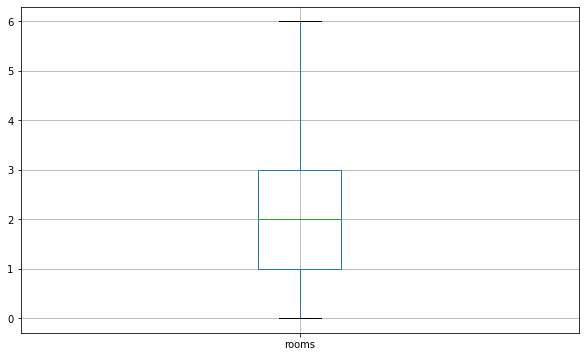

In [544]:
## Поработаем с выбросами
param.give_boxplot(df, 'rooms');

In [545]:
# Посмотрим сколько и какие значения мы можем отбросить
df[df['rooms'] > 6]

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day_exposition,month_exposition,year_exposition,floor_category,total_living_area_ratio,total_kitchen_area_ratio,category_days_exposition
581,1564812.0,20,65000000.0,365.0,2019-03-18,7,2.90,7,NaN,7,False,False,False,NaN,0,Санкт-Петербург,19827.0,1690.0,3.0,378.0,3.0,58.0,95,178082.191781,Monday,March,2019,last,NaN,NaN,2
648,1564812,3,17500000.0,183.7,2018-07-01,11,3.40,7,138.8,7,False,False,False,13.3,0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,95,95264.017420,Sunday,July,2018,last,75.558,7.240,2
660,1564812,3,49950000.0,483.9,2017-10-04,7,3.20,6,312.5,4,False,False,False,26.4,0,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391,103223.806572,Wednesday,October,2017,other,64.579,5.456,5
681,NaN,20,24900000.0,249.0,2015-08-13,7,2.50,5,180.0,4,False,False,False,NaN,1,Санкт-Петербург,24810.0,6108.0,0.0,NaN,0.0,NaN,781,100000.000000,Thursday,August,2015,other,72.289,NaN,5
750,NaN,9,29500000.0,188.8,2017-03-04,7,2.70,2,119.3,1,False,False,False,10.2,0,Санкт-Петербург,20965.0,814.0,0.0,NaN,2.0,267.0,246,156250.000000,Saturday,March,2017,first,63.189,5.403,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22264,1564812.0,20,22000000.0,141.0,2019-01-24,7,2.50,5,84.0,2,False,False,False,25.0,0,Санкт-Петербург,20243.0,3334.0,2.0,447.0,1.0,468.0,90,156028.368794,Thursday,January,2019,other,59.574,17.730,2
22420,1564812,12,25000000.0,196.0,2016-11-04,7,3.50,6,145.0,5,False,False,False,17.0,1,Санкт-Петербург,25083.0,3658.0,1.0,552.0,0.0,NaN,95,127551.020408,Friday,November,2016,other,73.980,8.673,2
22649,NaN,18,22900000.0,206.0,2016-04-04,7,2.50,6,142.0,2,False,False,False,16.2,0,Санкт-Петербург,25079.0,5544.0,0.0,NaN,1.0,251.0,75,111165.048544,Monday,April,2016,other,68.932,7.864,2
23400,NaN,17,30000000.0,213.0,2017-09-28,7,3.40,5,151.4,5,False,False,False,30.8,0,Санкт-Петербург,21146.0,1225.0,2.0,342.0,3.0,30.0,299,140845.070423,Thursday,September,2017,last,71.080,14.460,4


In [546]:
## Получаем данные столбца без выбросов
data_rooms = param.give_boxplot(df, 'rooms', value=1)

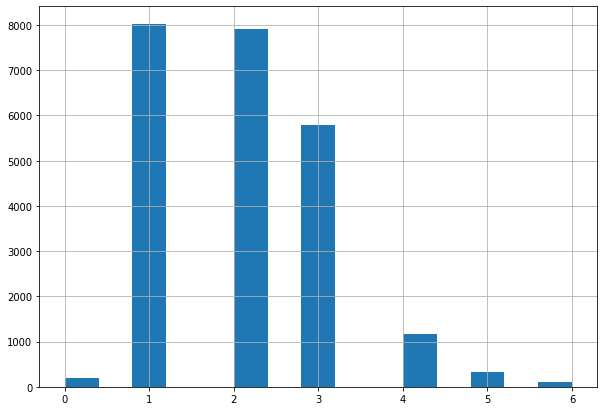

In [547]:
# Гистограмма очищенных данных
data_rooms.hist(bins=15);

**Вывод**

Посмотрев на столбец комнаты и поработав с выбросами можно сказать, что из 23576 - 59 имеют странные характеристики (0 комнат), также имеется  90 квартир которые мы отбросили после чистки. Большая часть значений лежит в диапазоне до 3х комнат, что выглядит правдаподобно. Распредление расположилось от 1 до 6 и опять это нормально.

### Высота потолков

In [548]:
df['ceiling_height'].describe()

count    23576.000000
mean         2.666619
std          0.997813
min          1.000000
25%          2.500000
50%          2.500000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

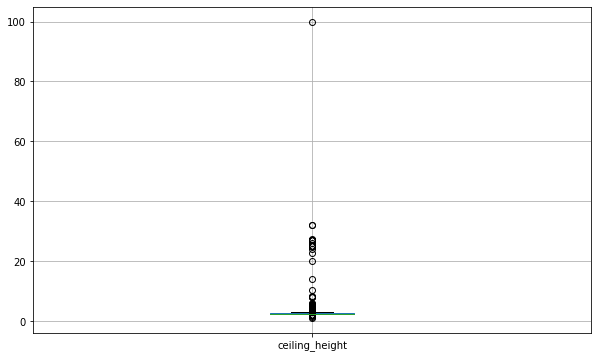

In [549]:
# Смотрим на грязные данные 
param.give_boxplot_param(df, 'ceiling_height', 0, 100)

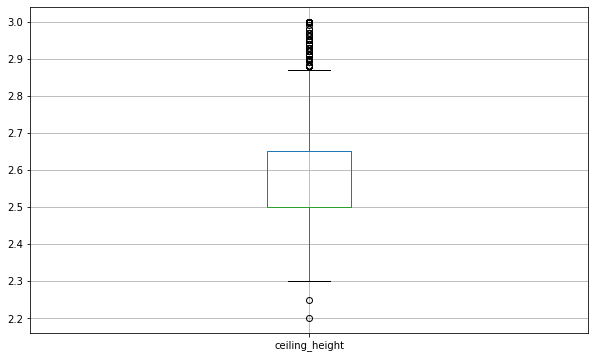

In [550]:
# Отбрасываем значения 
param.give_boxplot(df, 'ceiling_height');

In [551]:
values_ceiling_height = param.give_boxplot(df, 'ceiling_height', value=1)


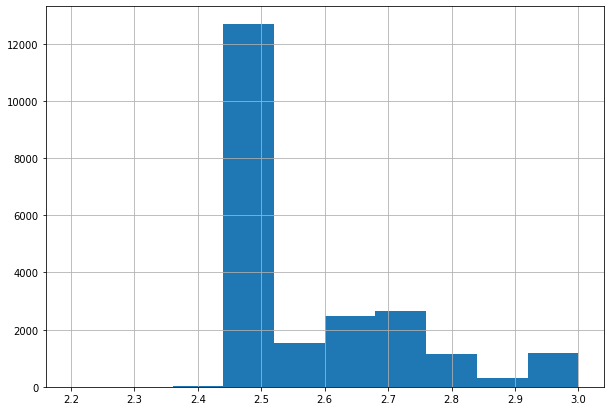

In [552]:
values_ceiling_height.hist();

**Вывод**

Видим что даже на грязных значениях средняя и медиана в ГОСТ значениях. Значения потолков в жилых многоквартирных домах должно колебаться от 2.5 метров. Хотя в частных домах эти значения могут колебаться сильнее. 

### Изучим время продажи квартиры. 
  Опишем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго.

При добавлении колонок мы добавили параметр ликвидности     
- 1 - высокая ликвидность < 50 дней
- 2, 3 - нормальная ликвидность от 100 до 200 дней
- 4 - низкая ликвидность около года
- 5 - отсутствие ликвидности более года  

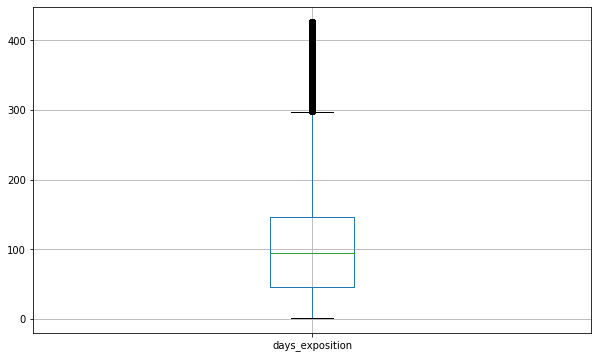

In [553]:
param.give_boxplot(df, 'days_exposition');

In [554]:
day_expos_clear = param.give_boxplot(df, 'days_exposition', value=1)
day_expos_clear.max()

427

In [555]:
# Посмотрим сколько обьектов лежим за пределами 1.5 квартильного размаха
len(df[df['days_exposition'] > 427])

2338

**2339 это достаточно много обьектов** которые мы отбросили из нашей выборки. Требуется поговорить о специалистом и уыеличить интервал значений для определения выбросов

In [556]:
df['days_exposition'].max()

1580

В целом обьекты находяться на продаже от 1 дня до более года - для рынка недвижимости это нормально.

In [557]:
category_days = df['category_days_exposition'].value_counts()
category_days

2    7368
1    6263
3    4096
5    3231
4    2618
Name: category_days_exposition, dtype: int64

In [558]:
percent = category_days/len(df)

In [559]:
# процентное и количественное соотношение ликвидных обьектов
percent_and_quantiy = pd.concat([category_days, percent], axis=1, sort=True)
percent_and_quantiy.columns = ['quantity','percent']
percent_and_quantiy

,quantity,percent
1,6263,0.265652
2,7368,0.312521
3,4096,0.173736
4,2618,0.111045
5,3231,0.137046


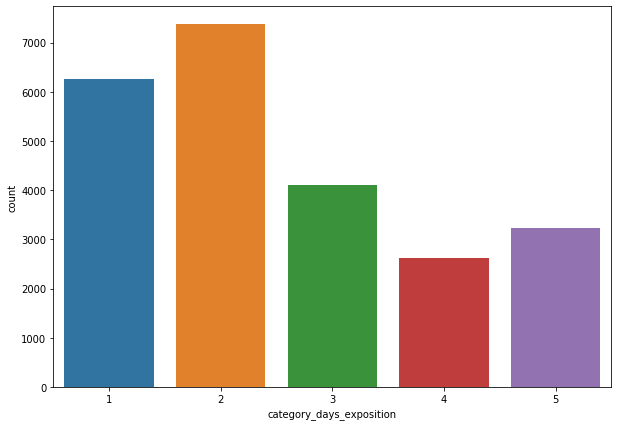

In [560]:
# Смотрим на распределение по категориям ликвидности
sns.countplot(df['category_days_exposition']);

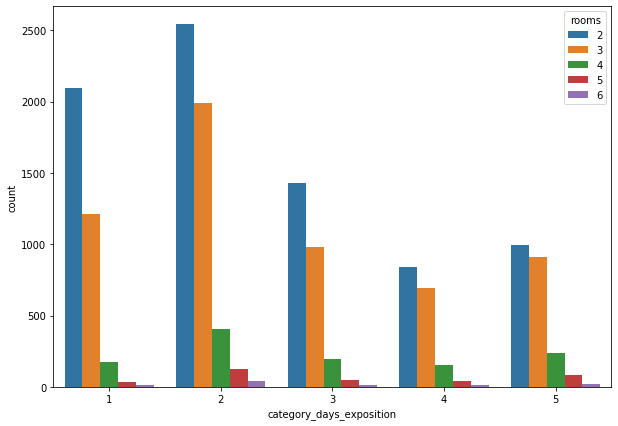

In [561]:
# Посмотрим на ликвидность в зависимости от количества комнат
room = df[(df['rooms'] > 1) & (df['rooms'] < 7) ]
sns.countplot(x='category_days_exposition', hue='rooms', data=room);

**Выыод**
- по ящику с усами наблюдаем, что продажа обычно занимает около 100 дней
- также принимаем во внимание что, если мы отбрасываем значения более 1.5 межквартильного размаха то мы теряем из выборки около 10 процентов значений, часть из которых предположительно не выбросы. Здесь требуется общаться с риэлторами и узнавать информации более детально. После нам потребуется расширить интервал значений для отсечения выбросов.
- распределение количества всех обьектов по ликвидности показывает что рынок в целом ликвиден. Обьектов в 1-3 категории больше чем в 4-5
- видим что однакомнатные и двухкомнатные квартиры самые ликвидные

## Влияние факторов на стоимость квартиры
- Опишем какие факторы больше всего влияют на стоимость квартиры.
- Изучим, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра.
  Также определим зависимость от даты размещения: дня недели, месяца

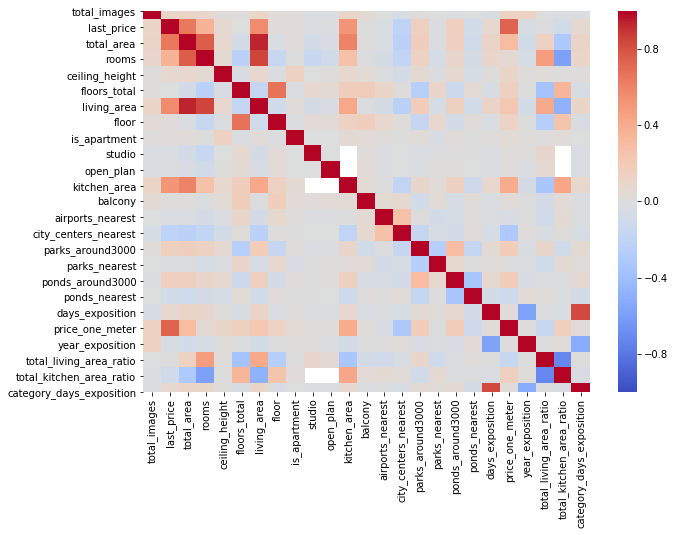

In [562]:
# Для начала посмотрим на график корреляции 
sns.heatmap(df.corr(), 
            vmin=-1,
            cmap='coolwarm',);

**Отберем интересные для нас параметры**

In [563]:
list_parametrs = ['last_price',
                  'price_one_meter',
                  'total_area',
                  'living_area',
                  'kitchen_area',
                  'rooms',
                  'floor', 
                  'floors_total', 
                  'floor_category',
                  'city_centers_nearest',
                  'day_exposition',
                  'month_exposition',   
                    ]
cost = df[list_parametrs]
cost


,last_price,price_one_meter,total_area,living_area,kitchen_area,rooms,floor,floors_total,floor_category,city_centers_nearest,day_exposition,month_exposition
0,13000000.0,120370.370370,108.00,51.0,25.00,3,8,16,other,16028.0,Thursday,March
1,3350000.0,82920.792079,40.40,18.6,11.00,1,1,11,first,18603.0,Tuesday,December
2,5196000.0,92785.714286,56.00,34.3,8.30,2,4,5,other,13933.0,Thursday,August
3,64900000.0,408176.100629,159.00,NaN,NaN,3,9,14,other,6800.0,Friday,July
4,10000000.0,100000.000000,100.00,32.0,41.00,2,13,14,other,8098.0,Tuesday,June
...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,72490.845228,133.81,73.3,13.83,3,3,5,other,4232.0,Tuesday,March
23695,3100000.0,52542.372881,59.00,38.0,8.50,3,4,5,other,NaN,Monday,January
23696,2500000.0,44091.710758,56.70,29.7,NaN,2,1,3,first,NaN,Sunday,February
23697,11475000.0,149511.400651,76.75,NaN,23.30,2,12,17,other,10364.0,Tuesday,March


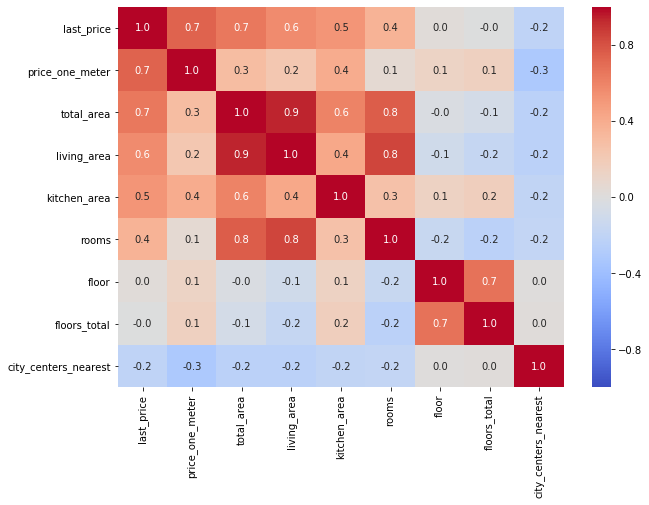

In [564]:
# Взглянем на корреляцию ближе
a = sns.heatmap(cost.corr(), 
            vmin=-1,
            cmap='coolwarm',
            annot=True, 
            fmt=".1f")
bottom, top = a.get_ylim()
a.set_ylim(bottom + 0.5, top - 0.5);

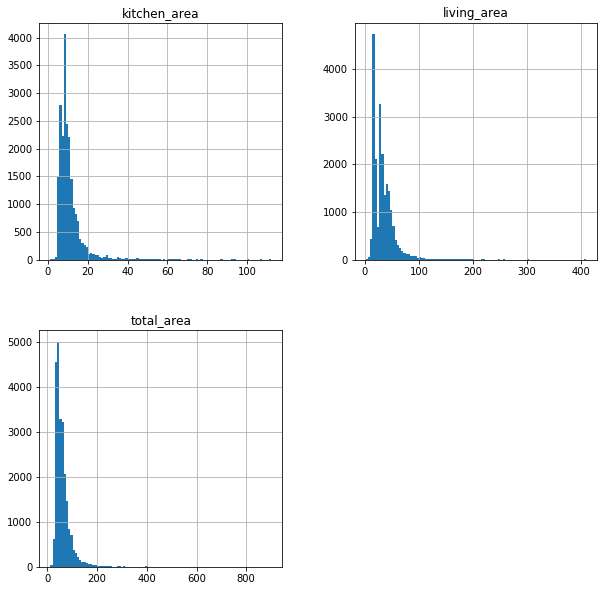

In [565]:
cost[['total_area', 'living_area', 'kitchen_area']].hist(bins=100,figsize=(10, 10));


### Зависит ли цена от квадратного метра

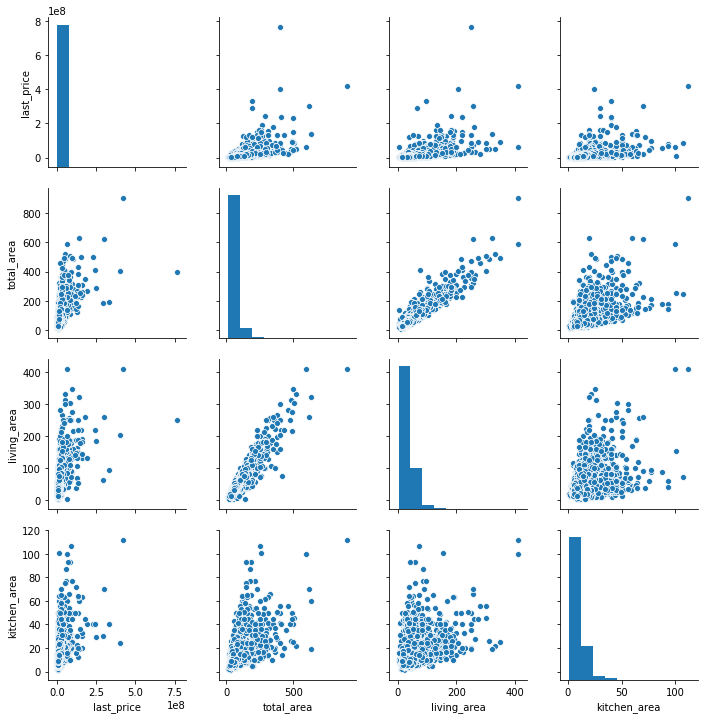

In [566]:
sns.pairplot(cost[['last_price','total_area','living_area', 'kitchen_area']]);

No handles with labels found to put in legend.


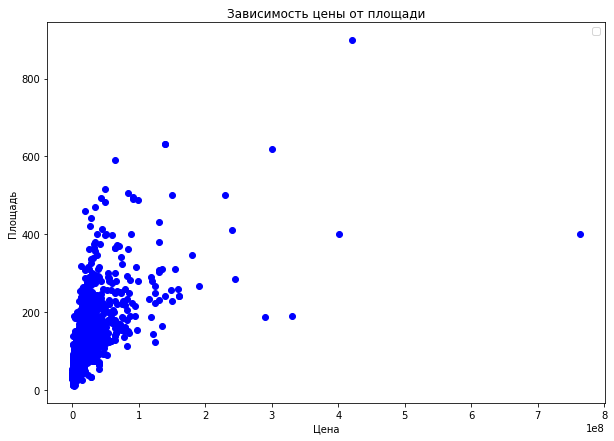

In [567]:
plt.scatter(cost['last_price'], cost['total_area'], color = 'blue')
plt.xlabel('Цена')
plt.ylabel('Площадь');
plt.legend();
plt.title('Зависимость цены от площади');

#### Чистые данные 

In [568]:
cost_clear = cost[(cost['total_area'] >= 12) & 
                  (cost['total_area'] <= 115)& 
                  (cost['last_price'] > 400000) & 
                  (cost['last_price'] < 12000000)]

No handles with labels found to put in legend.


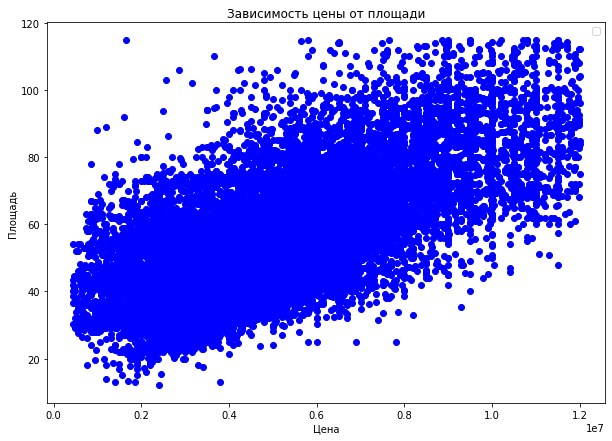

In [569]:
plt.scatter(cost_clear['last_price'], cost_clear['total_area'], color = 'blue')
plt.xlabel('Цена')
plt.ylabel('Площадь');
plt.legend();
plt.title('Зависимость цены от площади');

**Вывод**

По графикам и коэффициенту корреляции видим, что взаимосвязь между изменением цены за квадратный метр и стоимостью недвижимости присутствует.

#### Зависимость цены от количества комнат


In [570]:
x = cost[(cost['rooms'] >= 1) & (cost['rooms'] <= 6)]['rooms']
y = cost[(cost['last_price'] > 400000) & (cost['last_price'] < 12000000)]['last_price']

No handles with labels found to put in legend.


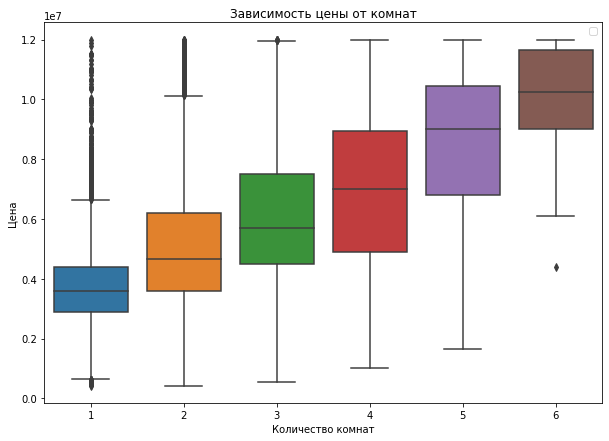

In [571]:
sns.boxplot(x=x, y=y, data=cost);
plt.xlabel('Количество комнат')
plt.ylabel('Цена');
plt.legend();
plt.title('Зависимость цены от комнат');

No handles with labels found to put in legend.


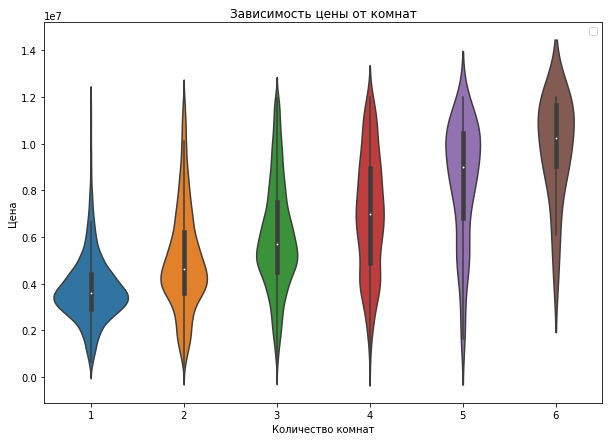

In [572]:
sns.violinplot(x=x, y=y, data=cost);
plt.xlabel('Количество комнат')
plt.ylabel('Цена');
plt.legend();
plt.title('Зависимость цены от комнат');

**Вывод**
Наблюдается повышение средней цены от количества комнат, что в полне закономерно. 
Для более точных данных по разнице средних потребуется обратиться к статистическому анализу

### Зависимость цены от этажности
- первого или последнего этажа

In [573]:
cost

,last_price,price_one_meter,total_area,living_area,kitchen_area,rooms,floor,floors_total,floor_category,city_centers_nearest,day_exposition,month_exposition
0,13000000.0,120370.370370,108.00,51.0,25.00,3,8,16,other,16028.0,Thursday,March
1,3350000.0,82920.792079,40.40,18.6,11.00,1,1,11,first,18603.0,Tuesday,December
2,5196000.0,92785.714286,56.00,34.3,8.30,2,4,5,other,13933.0,Thursday,August
3,64900000.0,408176.100629,159.00,NaN,NaN,3,9,14,other,6800.0,Friday,July
4,10000000.0,100000.000000,100.00,32.0,41.00,2,13,14,other,8098.0,Tuesday,June
...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,72490.845228,133.81,73.3,13.83,3,3,5,other,4232.0,Tuesday,March
23695,3100000.0,52542.372881,59.00,38.0,8.50,3,4,5,other,NaN,Monday,January
23696,2500000.0,44091.710758,56.70,29.7,NaN,2,1,3,first,NaN,Sunday,February
23697,11475000.0,149511.400651,76.75,NaN,23.30,2,12,17,other,10364.0,Tuesday,March


In [574]:
filter_costs_price = cost[(cost['last_price'] > 400000) & (cost['last_price'] < 12000000)]
pivot_costs = filter_costs_price.pivot_table(index='floor_category', values='last_price')
pivot_costs

,last_price
floor_category,
first,4.134271e+06
last,4.507544e+06
other,5.052530e+06


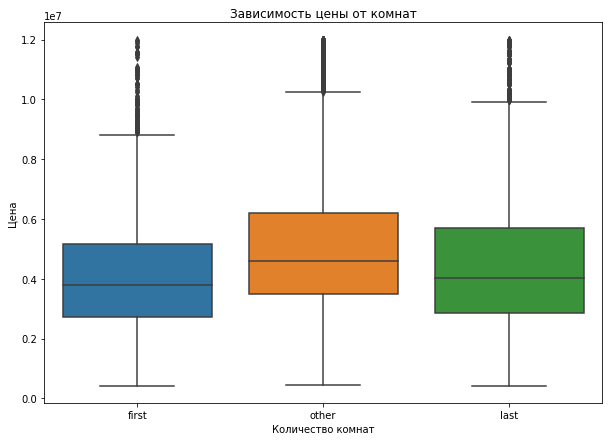

In [575]:
sns.boxplot(x='floor_category', y='last_price', data=filter_costs_price);
plt.xlabel('Количество комнат')
plt.ylabel('Цена');
plt.title('Зависимость цены от комнат');


In [576]:
# Посмотрим на самый дешевый этаж во всей выборке 
piv = filter_costs_price.pivot_table(index='floor', values='last_price').sort_values(by='last_price')
piv[:1]

,last_price
floor,
1,4.134271e+06


**Вывод**

Первый этаж - самое дешевое жилье. 

### Зависимость цены от удаленности от центра

In [577]:
filter_costs_price.describe()

,last_price,price_one_meter,total_area,living_area,kitchen_area,rooms,floor,floors_total,city_centers_nearest
count,2.159300e+04,21593.000000,21593.000000,19930.000000,19559.000000,21593.000000,21593.000000,21593.000000,16119.000000
mean,4.857731e+06,91965.601763,53.378243,30.625682,9.630022,1.933265,5.875284,10.760246,14961.092189
std,2.244885e+06,29580.055217,19.238653,13.595789,3.853903,0.914328,4.896195,6.637269,8566.474741
min,4.300000e+05,7962.962963,12.000000,2.000000,1.300000,0.000000,1.000000,1.000000,208.000000
25%,3.300000e+06,74509.803922,39.000000,18.020000,7.000000,1.000000,2.000000,5.000000,10590.000000
50%,4.400000e+06,92558.983666,49.400000,29.100000,9.000000,2.000000,4.000000,9.000000,13614.000000
75%,6.000000e+06,109292.604502,63.800000,39.400000,11.000000,3.000000,8.000000,16.000000,16697.500000
max,1.199900e+07,312240.000000,230.000000,160.000000,64.000000,7.000000,33.000000,60.000000,65968.000000


In [578]:
# Смотрим на количество обьектов которые выше медианы
len(filter_costs_price[filter_costs_price['city_centers_nearest'] > 13614]) / len(filter_costs_price) * 100

37.32228036863798

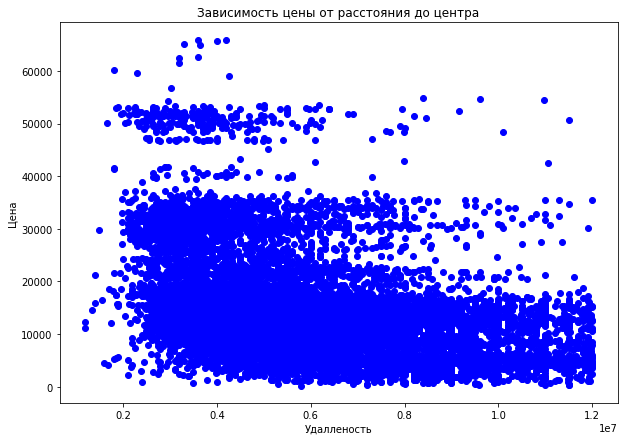

In [579]:
plt.scatter(filter_costs_price['last_price'], filter_costs_price['city_centers_nearest'], color = 'blue')
plt.xlabel('Удалленость')
plt.ylabel('Цена');
plt.title('Зависимость цены от расстояния до центра');

#### Взглянем на корреляцию по Пирсону

In [580]:
filter_costs_price['last_price'].corr(filter_costs_price['city_centers_nearest'])

-0.3461384733037677

**Вывод**

Наблюдаем легкую обратную корреляцию, график разброса также не показывает заметных зависимостей.
- 37 % обьектов удалены от центра более чем на 13 км это около среднего значения до кольцевой автодороги. Около трети обьектов расположились за КАД 


## Рассмотрим недвижимость в населенных пунктах
- Выберите 10 населённых пунктов с наибольшим числом объявлений.
- Посчитайте среднюю цену квадратного метра в этих населённых пунктах.
- Выделите населённые пункты с самой высокой и низкой стоимостью жилья.

In [581]:
# Ищем самые топ по количеству обьявлений
top_local = df['locality_name'].value_counts().head(10)
top_local

Санкт-Петербург      15659
поселок Мурино         552
поселок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

### Cчитаем среднюю цену квадратного метра в этих населённых пунктах.

In [582]:
top = top_local.index
top

Index(['Санкт-Петербург', 'поселок Мурино', 'поселок Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'поселок Парголово', 'Гатчина', 'деревня Кудрово',
       'Выборг'],
      dtype='object')

In [583]:
filter_df = df[(df['last_price'] > 400000) & (df['last_price'] < 12000000)]
filter_df.head()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day_exposition,month_exposition,year_exposition,floor_category,total_living_area_ratio,total_kitchen_area_ratio,category_days_exposition
1,NaN,7,3350000.0,40.4,2018-12-04,1,2.50,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920.792079,Tuesday,December,2018,first,46.040,27.228,2
2,Сталинский,10,5196000.0,56.0,2015-08-20,2,2.50,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.714286,Thursday,August,2015,other,61.250,14.821,5
4,NaN,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.000000,Tuesday,June,2018,other,32.000,41.000,3
5,NaN,10,2890000.0,30.4,2018-09-10,1,2.50,12,14.4,5,False,False,False,9.1,0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,95065.789474,Monday,September,2018,other,47.368,29.934,2
6,NaN,6,3700000.0,37.3,2017-11-02,1,2.50,26,10.6,6,False,False,False,14.4,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155,99195.710456,Thursday,November,2017,other,28.418,38.606,3


In [584]:
# Так через группировку

(
    filter_df[filter_df['locality_name'].isin(top)]
    .groupby('locality_name').agg({'locality_name': 'count', 'price_one_meter': 'mean'})
    .sort_values(by='price_one_meter', ascending=False).head(10)
)

,locality_name,price_one_meter
locality_name,,
Санкт-Петербург,13745,105516.330465
Пушкин,339,100322.823868
деревня Кудрово,298,92409.726322
поселок Парголово,327,90175.913458
поселок Мурино,552,85629.568678
поселок Шушары,439,78551.344545
Колпино,336,75185.478229
Гатчина,305,68421.902770
Всеволожск,397,67214.252635


In [585]:
# Или так

average_price = (
    
    filter_df[filter_df['locality_name'].isin(top)]
    .pivot_table(index='locality_name', values='price_one_meter')
    .sort_values(by='price_one_meter', ascending=False)
    
)

In [586]:
average_price = average_price.reset_index()
average_price

,locality_name,price_one_meter
0,Санкт-Петербург,105516.330465
1,Пушкин,100322.823868
2,деревня Кудрово,92409.726322
3,поселок Парголово,90175.913458
4,поселок Мурино,85629.568678
5,поселок Шушары,78551.344545
6,Колпино,75185.478229
7,Гатчина,68421.902770
8,Всеволожск,67214.252635
9,Выборг,57932.878606


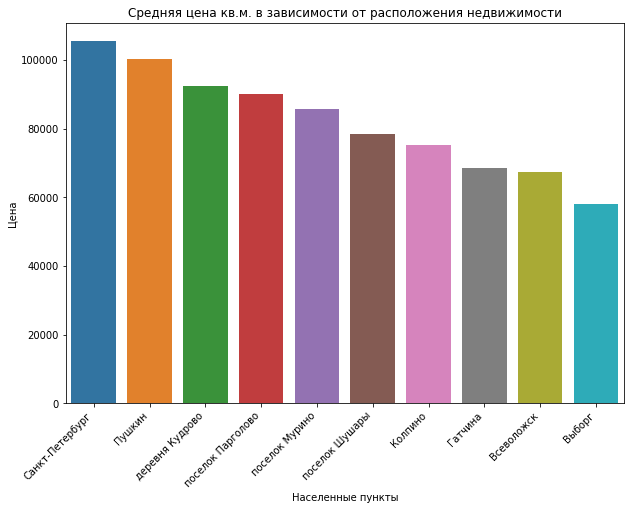

In [587]:
chart = sns.barplot(x = 'locality_name', y = 'price_one_meter', data=average_price)
plt.title('Средняя цена кв.м. в зависимости от расположения недвижимости')
plt.xlabel('Населенные пункты')
plt.ylabel('Цена');

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');

**Вывод**

- Как и ожидалось в северной столице самое дорогое жилье, далее немного отстает Пушкин, замыкает 10 - Выборг с ценой 57932. Разница с Питером почти в два раза.

### Недвижимость в Санкт-Петербурге


**Задачи** 
- выяснить, какая область входит в центр
- округлить значения до целых
- посчитать среднюю цену для каждого километра.
- построить график:зависимости цены от удаленности от центра
- определить границу, где график сильно меняется 



In [613]:
peterburgs = filter_df[filter_df['locality_name'] == 'Санкт-Петербург']
len(peterburgs)

13745

In [614]:
# Удалим пустые значения
peterburgs = peterburgs.dropna(subset=['city_centers_nearest'])

In [616]:
# Переводим в километры и целое цисло
peterburgs['city_centers_nearest_km'] = (peterburgs['city_centers_nearest']/1000).astype('int')

In [622]:
peterburgs.head(2)

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day_exposition,month_exposition,year_exposition,floor_category,total_living_area_ratio,total_kitchen_area_ratio,category_days_exposition,city_centers_nearest_km
2,Сталинский,10,5196000.0,56.0,2015-08-20,2,2.50,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.714286,Thursday,August,2015,other,61.25,14.821,5,13
4,NaN,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.000000,Tuesday,June,2018,other,32.00,41.000,3,8


In [645]:
# Смотрим как меняется цена в зависимости от удаления от центра
price_and_nearest = peterburgs.pivot_table(index='city_centers_nearest_km', values='last_price')
price_and_nearest.reset_index()

,city_centers_nearest_km,last_price
0,0,8.346372e+06
1,1,8.215223e+06
2,2,7.677004e+06
3,3,7.507096e+06
4,4,7.784569e+06
5,5,7.410599e+06
6,6,6.872211e+06
7,7,6.748674e+06
8,8,6.289074e+06
9,9,5.337051e+06


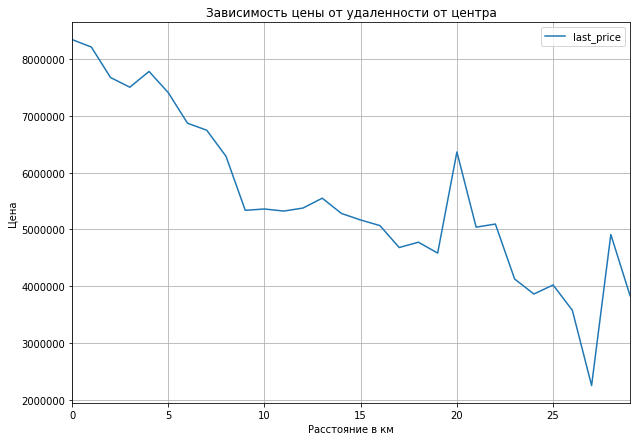

In [654]:
# Смотрим 
price_and_nearest.plot();
plt.xlabel('Расстояние в км')
plt.ylabel('Цена')
plt.title('Зависимость цены от удаленности от центра')
plt.grid();

In [661]:
( peterburgs[(peterburgs['city_centers_nearest_km'] > 17 ) & 
             (peterburgs['city_centers_nearest_km'] < 22 ) ]
            .sort_values(by='last_price', ascending=False)
 
 
).head()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day_exposition,month_exposition,year_exposition,floor_category,total_living_area_ratio,total_kitchen_area_ratio,category_days_exposition,city_centers_nearest_km
7373,NaN,20,11800000.0,95.6,2016-05-05,3,2.5,18,52.7,6,False,False,False,15.0,2,Санкт-Петербург,45997.0,18721.0,0.0,NaN,0.0,NaN,83,123430.962343,Thursday,May,2016,other,55.126,15.690,2,18
23566,NaN,6,11703000.0,126.5,2017-06-15,3,2.5,6,60.9,4,False,False,False,14.9,0,Санкт-Петербург,53520.0,18013.0,0.0,NaN,2.0,287.0,244,92513.833992,Thursday,June,2017,other,48.142,11.779,4,18
6353,NaN,0,11620701.0,122.3,2018-10-01,2,2.8,3,NaN,3,True,False,False,NaN,0,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,95,95017.996729,Monday,October,2018,last,NaN,NaN,2,20
116,1564812.0,18,10999000.0,97.2,2017-11-13,3,2.5,16,NaN,16,False,False,False,18.3,5,Санкт-Петербург,19426.0,21138.0,0.0,NaN,2.0,390.0,394,113158.436214,Monday,November,2017,last,NaN,18.827,5,21
21809,NaN,20,10600000.0,77.0,2019-04-16,2,2.5,35,39.0,11,False,False,False,14.0,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,95,137662.337662,Tuesday,April,2019,other,50.649,18.182,2,20


**Вывод**

После просмотра неждвижимости в Санкт-Петербурге видим что действительно цена квадратного метра меняется в зависимости от ростояния  от центра.
После 8 километра цена снижается менее активно. Также видим всплески на 20 км и после 25.


### Рассмотрим сегмент удаленностью не более 8 км

- выделите сегмент квартир в центре.
- анализ параметров: площадь, цена, число комнат, высота потолков.
  выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, - сравнить выводы сегмента от выводов по всем обьектам региона

In [704]:
# Подготовим значения
filter_df = df[(df['last_price'] > 400000) & 
               (df['last_price'] < 12000000) &
               (df['total_area'] >= 12) & 
               (df['total_area'] <= 115)]
segment = peterburgs[(peterburgs['city_centers_nearest_km'] < 8 )]

#### Посмотрим на корреляцию цены с параметрами по всей выборке и отдельного сегмента

In [705]:
all_data = filter_df.corr()['last_price'].reset_index()
segment_expensive = peterburgs[(peterburgs['city_centers_nearest_km'] < 8 )].corr()['last_price'].reset_index()

In [706]:
table_corr = all_data.merge(segment_expensive, on='index',
               suffixes=('_all', '_center')).sort_values(by='last_price_all',ascending=False)

In [707]:
table_corr.style.background_gradient('coolwarm')

,index,last_price_all,last_price_center
1,last_price,1,1
2,total_area,0.698476,0.695042
20,price_one_meter,0.63046,0.167007
6,living_area,0.568671,0.588411
11,kitchen_area,0.483025,0.429717
3,rooms,0.434332,0.491145
5,floors_total,0.198387,0.0730756
0,total_images,0.16425,0.101458
17,ponds_around3000,0.146211,0.0159917
7,floor,0.137872,0.116139


### Разницa цен по этажности

In [708]:
# Вся выборка
filter_df.pivot_table(index='floor_category', values='last_price')

,last_price
floor_category,
first,4.091900e+06
last,4.449046e+06
other,5.018593e+06


In [709]:
# Сегмент рынка
segment.pivot_table(index='floor_category', values='last_price')

,last_price
floor_category,
first,6.296033e+06
last,7.523992e+06
other,7.649302e+06


In [710]:
(
   filter_df.pivot_table(index='floor_category', values='last_price')
    .merge(segment.pivot_table(index='floor_category', values='last_price'), 
           on='floor_category', suffixes=('_all', '_center'))
    .sort_values(by='last_price_all',ascending=False)
)

,last_price_all,last_price_center
floor_category,,
other,5.018593e+06,7.649302e+06
last,4.449046e+06,7.523992e+06
first,4.091900e+06,6.296033e+06


Видим ощутимую разницу в цене, но зависимость не изменилась. По прежнему первый и последний этаж дешевле других

### Разница цен в зависимости от количества комнат

In [711]:
(
   filter_df.pivot_table(index='rooms', values='last_price')
    .merge(segment.pivot_table(index='rooms', values='last_price'), 
           on='rooms', suffixes=('_all', '_center'))
    .sort_values(by='last_price_all',ascending=False)
)

,last_price_all,last_price_center
rooms,,
6,8.141000e+06,1.036655e+07
5,7.253433e+06,9.919645e+06
4,6.762450e+06,9.039926e+06
3,6.000905e+06,8.189538e+06
2,5.015428e+06,7.170589e+06
1,3.757968e+06,5.896899e+06
0,2.924644e+06,4.342812e+06


Средняя разница в зависимости от расположения колеблется около 2 млн. рублей 

### Разница цен в зависимости от площади 

- так как параметры количественные то строим линейный график

In [715]:
(
   filter_df.pivot_table(index='total_area', values='last_price')
    .merge(segment.pivot_table(index='total_area', values='last_price'), 
           on='total_area', suffixes=('_all', '_center'))
    .sort_values(by='last_price_all',ascending=False)
)

,last_price_all,last_price_center
total_area,,
104.10,11999000.0,11999000.0
112.10,11983878.0,11983878.0
94.15,11939000.0,11939000.0
60.84,11900000.0,11900000.0
93.80,11800000.0,11800000.0
...,...,...
16.00,2100000.0,2100000.0
28.60,2034000.0,3595000.0
18.00,1872000.0,3300000.0


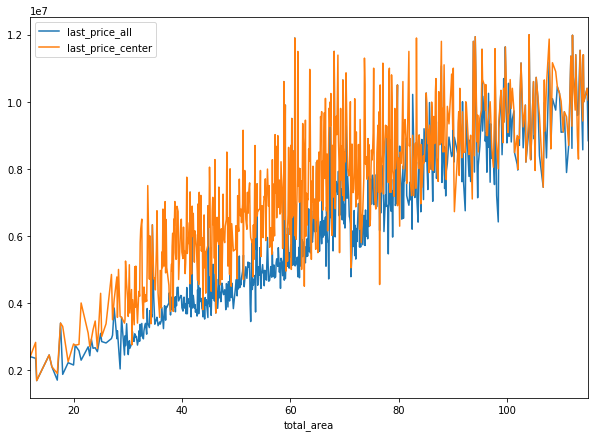

In [716]:
(
   filter_df.pivot_table(index='total_area', values='last_price')
    .merge(segment.pivot_table(index='total_area', values='last_price'), 
           on='total_area', suffixes=('_all', '_center'))
    .sort_values(by='total_area',ascending=False)
).plot();

Цена за квадратный метр ожидаемо выше но и выражаена более рвано. Это может говорить о более высоком разбросе цен на похожую недвижимость. Но при просмотре общей цены график становиться более пологим.

**Вывод**
- Недвижимость в центре как и ожидалось стоит дороже чем более удаленная
- Факторы, влияющие на стоимость:
    * общая площадь
    * кол-во комнат
    * выбранный этаж - первый и последний дешевле остальных

<a name="5"></a>
#  Результаты исследования

    
[Наверх к оглавлению](#1)